In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
from __future__ import division
import requests
from StringIO import StringIO

In [4]:
url = 'http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv'
source = requests.get(url).text
poll_data = StringIO(source)

In [5]:
print(type(source), type(poll_data))

(<type 'unicode'>, <type 'instance'>)


In [6]:
poll_df = pd.read_csv(poll_data)
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 15 columns):
Pollster                  590 non-null object
Start Date                590 non-null object
End Date                  590 non-null object
Entry Date/Time (ET)      590 non-null object
Number of Observations    568 non-null float64
Population                590 non-null object
Mode                      590 non-null object
Obama                     590 non-null int64
Romney                    590 non-null int64
Other                     202 non-null float64
Undecided                 423 non-null float64
Pollster URL              590 non-null object
Source URL                588 non-null object
Partisan                  590 non-null object
Affiliation               590 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 69.2+ KB


In [7]:
poll_df.shape

(590, 15)

In [8]:
poll_df.head(3)

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47,47,NaN,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None
1,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48,48,NaN,4.0,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None
2,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50,49,1.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None


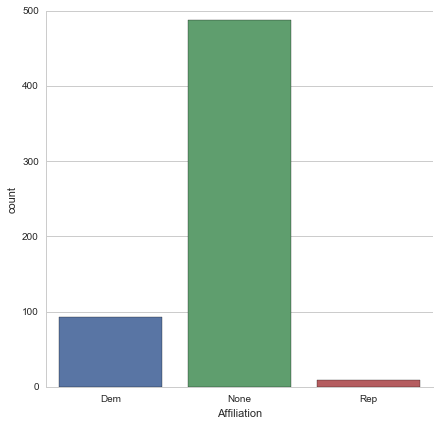

In [9]:
sns.factorplot('Affiliation',data=poll_df,kind='count',order=['Dem','None','Rep'],size=6)

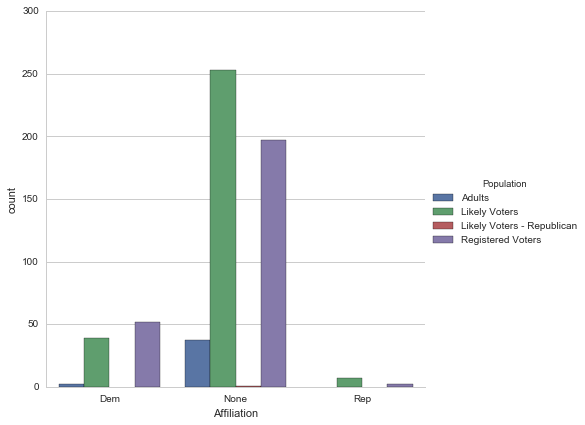

In [10]:
sns.factorplot('Affiliation',data=poll_df,kind='count',order=['Dem','None','Rep'],hue='Population',
               hue_order=['Adults','Likely Voters','Likely Voters - Republican','Registered Voters'],size=6)

In [11]:
avg = pd.DataFrame(poll_df.mean())
avg.head()

,0
Number of Observations,1295.394366
Obama,46.774576
Romney,44.572881
Other,3.400990
Undecided,6.546099


In [12]:
avg.drop('Number of Observations',axis=0,inplace=True)

In [13]:
avg

,0
Obama,46.774576
Romney,44.572881
Other,3.400990
Undecided,6.546099


In [14]:
std = pd.DataFrame(poll_df.std())
std.drop('Number of Observations',axis=0,inplace=True)
std

,0
Obama,2.447069
Romney,2.925320
Other,2.721318
Undecided,3.698614


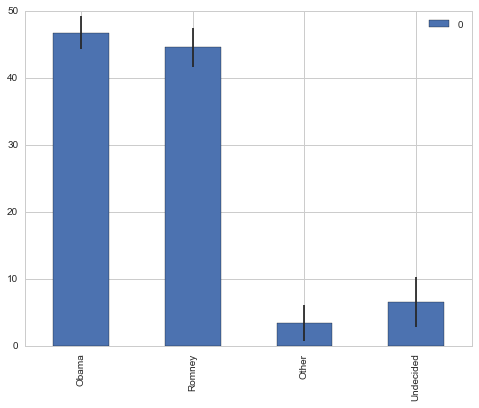

In [15]:
avg.plot(kind='bar',legend=True,figsize=(8,6),yerr=std)

In [16]:
poll_avg = pd.concat([avg, std],axis=1)
poll_avg.columns = ['Average','STD']
poll_avg

,Average,STD
Obama,46.774576,2.447069
Romney,44.572881,2.925320
Other,3.400990,2.721318
Undecided,6.546099,3.698614


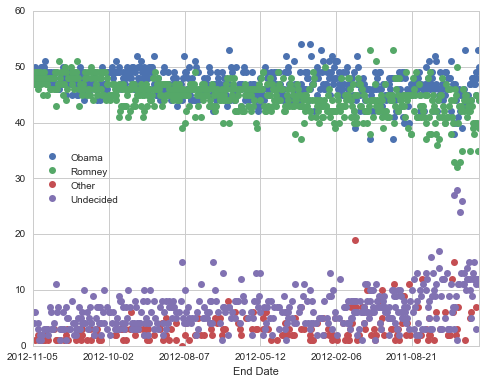

In [17]:
poll_df.plot(x='End Date',y=['Obama','Romney','Other','Undecided'],linestyle='',marker='o',figsize=(8,6))

In [18]:
from datetime import datetime

In [19]:
poll_df['Difference'] = (poll_df.Obama - poll_df.Romney)/100

In [20]:
poll_df = poll_df.groupby(['Start Date'], as_index=False).mean()
poll_df.head(3)

,Start Date,Number of Observations,Obama,Romney,Other,Undecided,Difference
0,2009-03-13,1403.0,44.0,44.0,NaN,12.0,0.00
1,2009-04-17,686.0,50.0,39.0,NaN,11.0,0.11
2,2009-05-14,1000.0,53.0,35.0,NaN,12.0,0.18


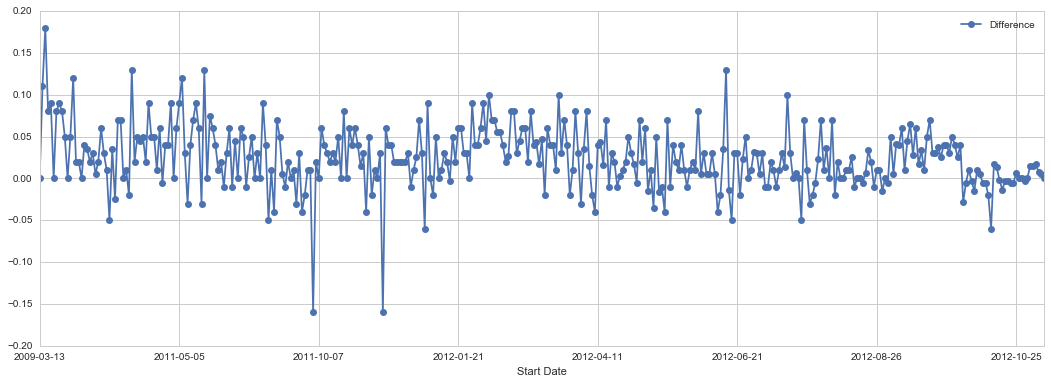

In [21]:
poll_df.plot(x='Start Date',y='Difference',linestyle='-',marker='o',figsize=(18,6))

In [22]:
row = 0
xlimit = []
for date in poll_df['Start Date']:
    if date[0:7] == '2012-10':
        xlimit.append(row)
    row += 1
print min(xlimit)
print max(xlimit)

329
356


In [23]:
poll_df.shape

(361, 7)

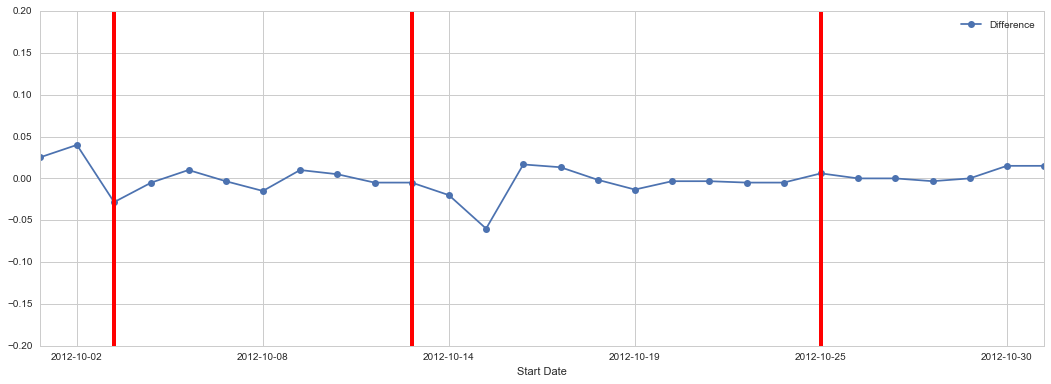

In [24]:
poll_df.plot(x='Start Date',y='Difference',linestyle='-',marker='o',figsize=(18,6),xlim=(329,356))

# 1st debate, Oct 3rd
plt.axvline(x=329+2,linewidth=4,color='red')
# 2nd debate, Oct 11th
plt.axvline(x=329+10,linewidth=4,color='red')
# 3rd debate, Oct 22nd
plt.axvline(x=329+21,linewidth=4,color='red')

In [25]:
pwd

u'C:\\Users\\yren\\Documents\\learning-python-for-data-analysis-and-visualization'

In [26]:
donor_df = pd.read_csv('Election_Donor_Data.csv',low_memory=False)
donor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 122.3+ MB


In [27]:
donor_df.head(3)

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073


In [28]:
donor_df['contb_receipt_amt'].value_counts()

 100.00     178188
 50.00      137584
 25.00      110345
 250.00      91182
 500.00      57984
 2500.00     49005
 35.00       37237
 1000.00     36494
 10.00       33986
 200.00      27813
 20.00       17565
 15.00       16163
 150.00      14600
 75.00       13647
 201.20      11718
 30.00       11381
 300.00      11204
 20.12        9897
 5.00         9024
 40.00        5007
 2000.00      4128
 55.00        3760
 1500.00      3705
 3.00         3383
 60.00        3084
 400.00       3066
-2500.00      2727
 110.00       2554
 125.00       2520
 19.00        2474
             ...  
 236.07          1
 153.60          1
 116.35          1
 233.33          1
 86.21           1
 600.74          1
 130.20          1
 50.04           1
 78.55           1
 266.10          1
 77.83           1
 222.75          1
 217.75          1
 261.50          1
 240.25          1
-45.50           1
 161.50          1
 268.76          1
 100.56          1
 6.26            1
 114.43          1
 823.88     

In [29]:
len(donor_df['contb_receipt_amt'].value_counts())

8079

In [30]:
don_mean = donor_df['contb_receipt_amt'].mean()
don_std = donor_df['contb_receipt_amt'].std()
print 'The average donation was %.2f with std of %.2f' %(don_mean,don_std)

The average donation was 298.24 with std of 3749.67


In [31]:
top_donor = donor_df['contb_receipt_amt'].copy()
top_donor.sort_values(inplace=True)
top_donor

114604     -30800.00
226986     -25800.00
101356      -7500.00
398429      -5500.00
250737      -5455.00
33821       -5414.31
908565      -5115.00
456649      -5000.00
574657      -5000.00
30513       -5000.00
562267      -5000.00
30584       -5000.00
86268       -5000.00
708920      -5000.00
665887      -5000.00
708899      -5000.00
708929      -5000.00
21172       -5000.00
21168       -5000.00
21167       -5000.00
262328      -5000.00
946875      -5000.00
7361        -5000.00
416403      -5000.00
21164       -5000.00
707945      -5000.00
615101      -5000.00
7973        -5000.00
54430       -5000.00
54434       -5000.00
             ...    
708022      10000.00
708898      10000.00
710177      10000.00
876244      10000.00
709608      10000.00
708919      10000.00
709739      10000.00
91145       10000.00
708138      10000.00
993178      10000.00
709813      10000.00
710730      10000.00
708928      10000.00
709268      10000.00
99829       10000.00
90076       10000.00
709859      1

In [32]:
top_donor = top_donor[top_donor > 0]
top_donor.sort_values(inplace=True)
top_donor.value_counts().head(10)

100.0     178188
50.0      137584
25.0      110345
250.0      91182
500.0      57984
2500.0     49005
35.0       37237
1000.0     36494
10.0       33986
200.0      27813
Name: contb_receipt_amt, dtype: int64

In [33]:
type(top_donor)

pandas.core.series.Series

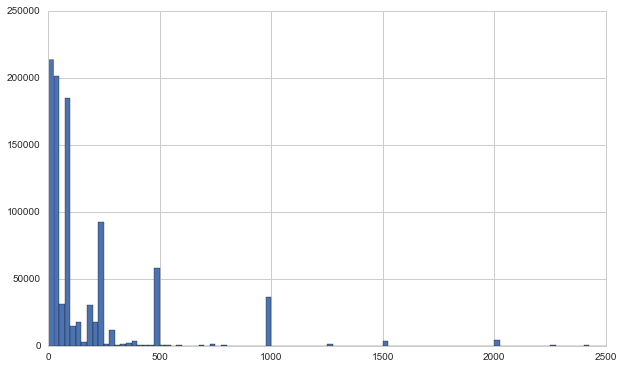

In [34]:
common_donation = top_donor[top_donor < 2500]
common_donation.hist(bins=100,figsize=(10,6))

In [35]:
candidates = donor_df.cand_nm.unique()
candidates

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick', 'Cain, Herman',
       'Gingrich, Newt', 'McCotter, Thaddeus G', 'Huntsman, Jon',
       'Perry, Rick'], dtype=object)

In [37]:
m = {}
for c in list(candidates):
    if c == 'Obama, Barack':
        m[c] = 'Democrat'
    else:
        m[c] = 'Republican'
m

{'Bachmann, Michelle': 'Republican',
 'Cain, Herman': 'Republican',
 'Gingrich, Newt': 'Republican',
 'Huntsman, Jon': 'Republican',
 'Johnson, Gary Earl': 'Republican',
 'McCotter, Thaddeus G': 'Republican',
 'Obama, Barack': 'Democrat',
 'Paul, Ron': 'Republican',
 'Pawlenty, Timothy': 'Republican',
 'Perry, Rick': 'Republican',
 "Roemer, Charles E. 'Buddy' III": 'Republican',
 'Romney, Mitt': 'Republican',
 'Santorum, Rick': 'Republican'}

In [38]:
donor_df['Party'] = donor_df.cand_nm.map(m)
donor_df.tail()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
1001726,C00500587,P20003281,"Perry, Rick","GORMAN, CHRIS D. MR.",INFO REQUESTED,XX,99999,INFORMATION REQUESTED PER BEST EFFORTS,INFORMATION REQUESTED PER BEST EFFORTS,5000.0,29-SEP-11,REATTRIBUTION / REDESIGNATION REQUESTED (AUTOM...,NaN,REATTRIBUTION / REDESIGNATION REQUESTED (AUTOM...,SA17A,751678,Republican
1001727,C00500587,P20003281,"Perry, Rick","DUFFY, DAVID A. MR.",INFO REQUESTED,XX,99999,DUFFY EQUIPMENT COMPANY INC.,BUSINESS OWNER,2500.0,30-SEP-11,NaN,NaN,NaN,SA17A,751678,Republican
1001728,C00500587,P20003281,"Perry, Rick","GRANE, BRYAN F. MR.",INFO REQUESTED,XX,99999,INFORMATION REQUESTED PER BEST EFFORTS,INFORMATION REQUESTED PER BEST EFFORTS,500.0,29-SEP-11,NaN,NaN,NaN,SA17A,751678,Republican
1001729,C00500587,P20003281,"Perry, Rick","TOLBERT, DARYL MR.",INFO REQUESTED,XX,99999,T.A.C.C.,LONGWALL MAINTENANCE FOREMAN,500.0,30-SEP-11,NaN,NaN,NaN,SA17A,751678,Republican
1001730,C00500587,P20003281,"Perry, Rick","ANDERSON, MARILEE MRS.",INFO REQUESTED,XX,99999,INFORMATION REQUESTED PER BEST EFFORTS,INFORMATION REQUESTED PER BEST EFFORTS,2500.0,31-AUG-11,NaN,NaN,NaN,SA17A,751678,Republican


In [40]:
donor_df = donor_df[donor_df.contb_receipt_amt > 0]
donor_df.shape

(991475, 17)

In [42]:
donor_df.groupby('cand_nm')['contb_receipt_amt'].count()

cand_nm
Bachmann, Michelle                 13082
Cain, Herman                       20052
Gingrich, Newt                     46883
Huntsman, Jon                       4066
Johnson, Gary Earl                  1234
McCotter, Thaddeus G                  73
Obama, Barack                     589127
Paul, Ron                         143161
Pawlenty, Timothy                   3844
Perry, Rick                        12709
Roemer, Charles E. 'Buddy' III      5844
Romney, Mitt                      105155
Santorum, Rick                     46245
Name: contb_receipt_amt, dtype: int64

In [44]:
cand_amount = donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()
type(cand_amount)

pandas.core.series.Series

In [57]:
i = 0
for x in cand_amount:
    print '%-30s raised %.2f' %(cand_amount.index[i],x)
    i += 1

Bachmann, Michelle             raised 2711439.29
Cain, Herman                   raised 7101081.89
Gingrich, Newt                 raised 12832769.69
Huntsman, Jon                  raised 3330373.48
Johnson, Gary Earl             raised 566961.60
McCotter, Thaddeus G           raised 39030.00
Obama, Barack                  raised 135877427.24
Paul, Ron                      raised 21009619.83
Pawlenty, Timothy              raised 6004819.48
Perry, Rick                    raised 20305754.00
Roemer, Charles E. 'Buddy' III raised 373009.90
Romney, Mitt                   raised 88335907.53
Santorum, Rick                 raised 11043159.31


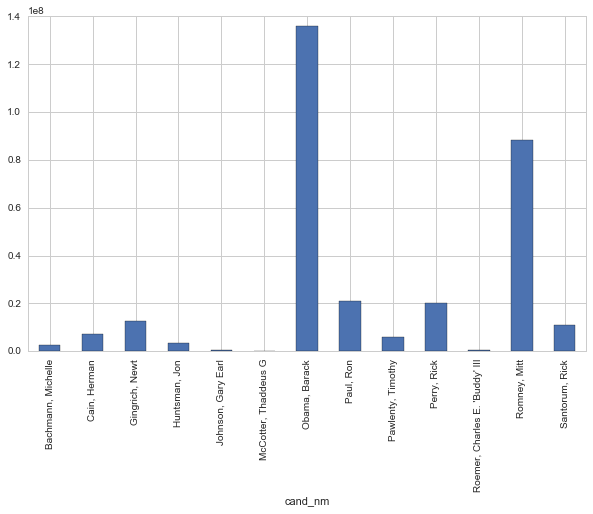

In [60]:
cand_amount.plot(kind='bar',figsize=(10,6))

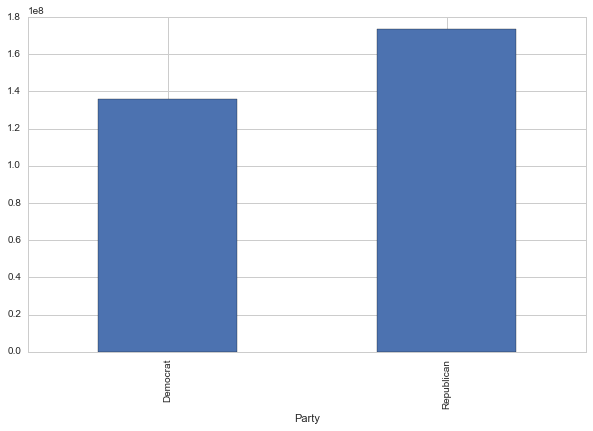

In [64]:
donor_df.groupby('Party')['contb_receipt_amt'].sum().plot(kind='bar',figsize=(10,6))

In [65]:
occupation_df = donor_df.pivot_table(values='contb_receipt_amt',index='contbr_occupation',columns='Party',aggfunc='sum')

In [66]:
occupation_df.head()

Party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN


In [67]:
occupation_df.shape

(45067, 2)

In [68]:
occupation_df = occupation_df[occupation_df.sum(axis=1) > 1000000]

In [69]:
occupation_df.shape

(31, 2)

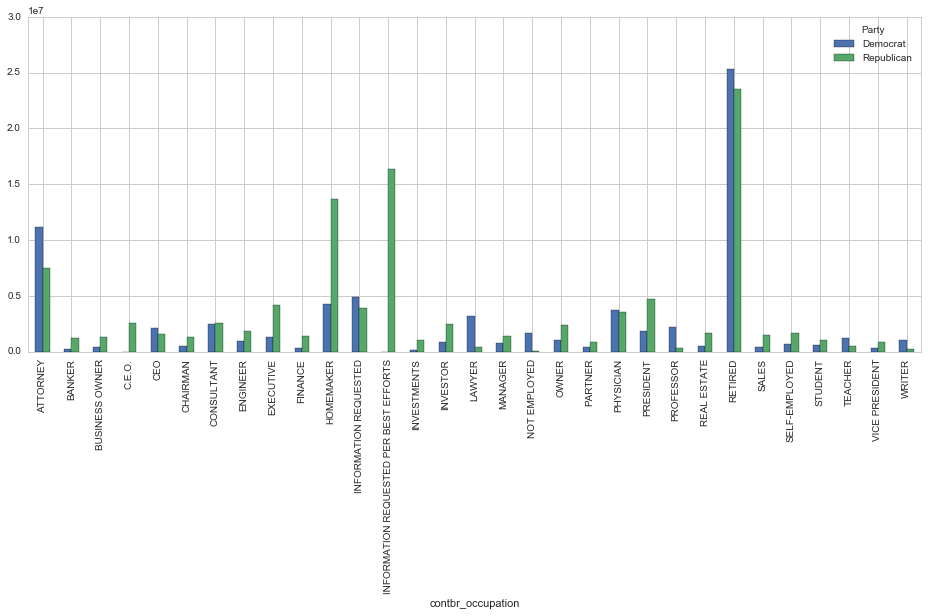

In [73]:
occupation_df.plot(kind='bar',figsize=(16,6))

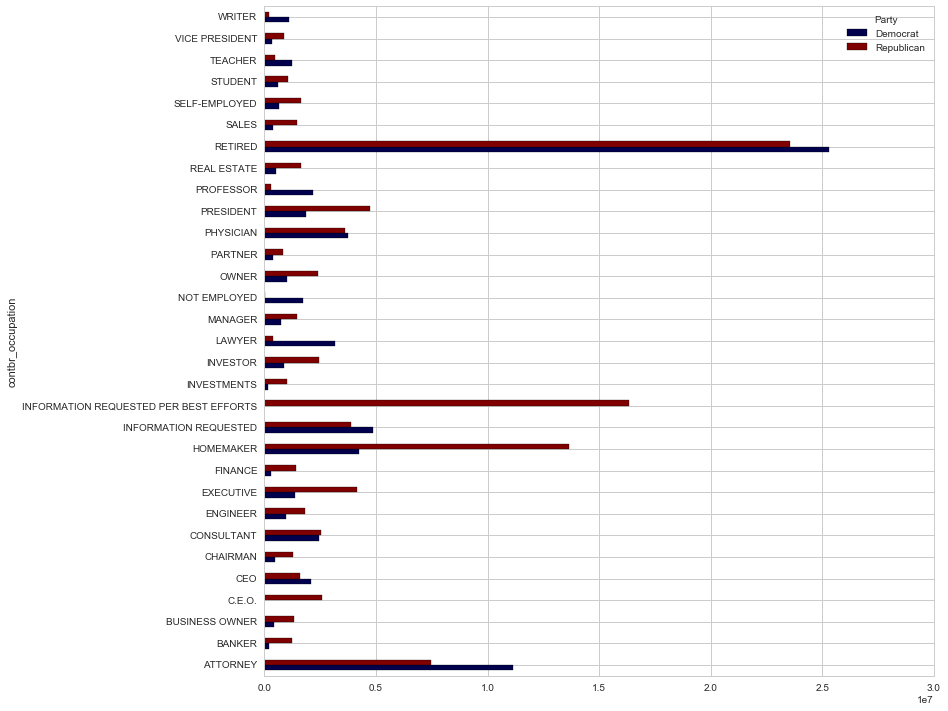

In [77]:
occupation_df.plot(kind='barh',figsize=(12,12),cmap='seismic')

In [78]:
occupation_df.drop(['INFORMATION REQUESTED','INFORMATION REQUESTED PER BEST EFFORTS'],axis=0,inplace=True)

In [79]:
occupation_df.loc['C.E.O.']

Party
Democrat         1690.00
Republican    2592983.11
Name: C.E.O., dtype: float64

In [80]:
occupation_df.loc['CEO']

Party
Democrat      2073284.79
Republican    1618057.41
Name: CEO, dtype: float64

In [81]:
occupation_df.loc['CEO'] = occupation_df.loc['CEO'] + occupation_df.loc['C.E.O.']
occupation_df.drop('C.E.O.',axis=0,inplace=True)

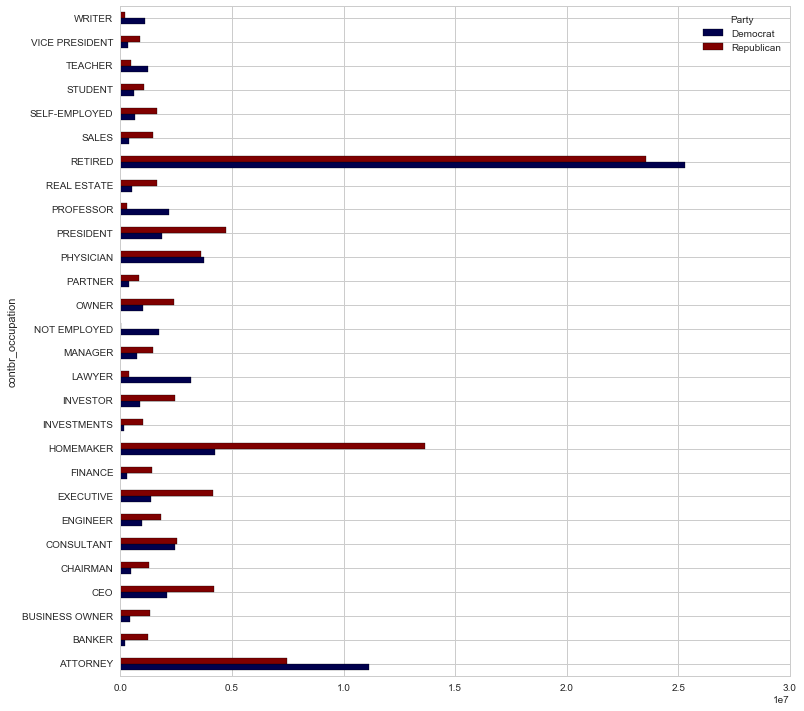

In [82]:
occupation_df.plot(kind='barh',figsize=(12,12),cmap='seismic')